# General linear model on fMRI data



## First level analysis

Analysis performed on a level of single subject (individual).

In [42]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nilearn.glm.first_level import FirstLevelModel
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, show, plot_design_matrix, plot_contrast_matrix
from nistats.thresholding import map_threshold
from nistats.reporting import get_clusters_table

## Load data

In [24]:
# Load a table with events 
events_path = "../fMRI_BIDS_rhymejudgment/sub-01/func/sub-01_task-rhymejudgment_events.tsv"


,onset,duration,trial_type
0,20.001,2.0,word
1,22.501,2.0,word
2,25.001,2.0,word
3,27.501,2.0,word
4,30.001,2.0,word


In [21]:
# Load preprocessed fMRI images
fmri_img = "../fMRI_BIDS_rhymejudgment/derivatives/fmriprep/sub-01/func/sub-01_task-rhymejudgment_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"

In [22]:
# Load confounds and select six motion parameters
confounds_path = "../fMRI_BIDS_rhymejudgment/derivatives/fmriprep/sub-01/func/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv"


## Run first level GLM

In [44]:
t_r = 2 # repetition time (TR)

# Define model
first_level_model = FirstLevelModel(t_r, 
                                    hrf_model='spm', 
                                    high_pass=.01,
                                    smoothing_fwhm=6)
# Fit model to data


In [45]:
design_matrix = first_level_model.design_matrices_[0]

# Print head of the dataframe


AttributeError: 'FirstLevelModel' object has no attribute 'design_matrices_'

In [31]:
# Plot design matrix using plot_design_matrix


In [33]:
# Print timeseries of task-HRF data using plt.plot


## Create contrasts

In [34]:
# Create conditions
conditions = {'pseudoword': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0]), 
              'word': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0])}

In [43]:
# Create contrasts (word > pseudoword, main word effect)

# Plot contrast matrix with plot_contrast_matrix


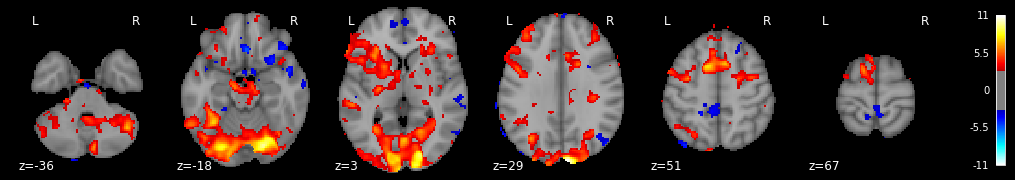

In [38]:
# Calculate statistic test for selected contrast (brain activity for word processing), use compute_contrasts
z_map = first_level_model.compute_contrast(word_effect,
                                  output_type='z_score')

# Plot results using plot_stat_map


In [ ]:
# Plot results on a glass brain


In [46]:
# Plot results on interactive plot



## Thresholding

In [47]:
# Calculate threshold to correct for multiple comparisons
_, threshold = map_threshold(z_map, alpha=.05, height_control='bonferroni')
print('Corrected p<0.05 threshold: %.3f' % threshold)


# Threshold images with calculated threshold


Corrected p<0.05 threshold: 5.179


In [48]:
# Get cluster table using get_clusters_table


# Repeat GLM analysis with design matrix extended by 6 motion parameters

In [49]:
# Repeat everything with motion as nuisance regressors.

# Print head of the dataframe


In [37]:
# Create conditions 


In [50]:
# Create contrasts

# Plot contrast matrix


In [51]:
# Calculate statistic test for selected contrast (brain activity for word processing)


Uncorrected p<0.001 threshold: 5.048


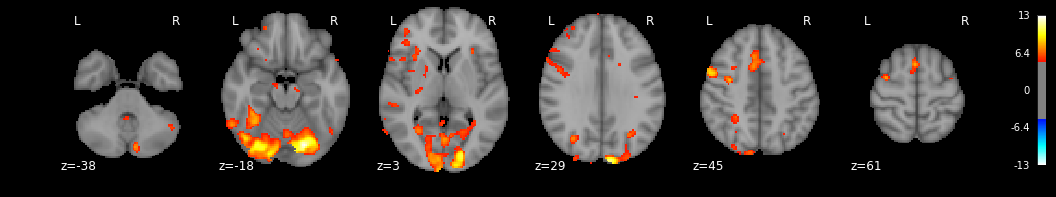

In [42]:
# Threshold z-maps to correct for multiple comparisons


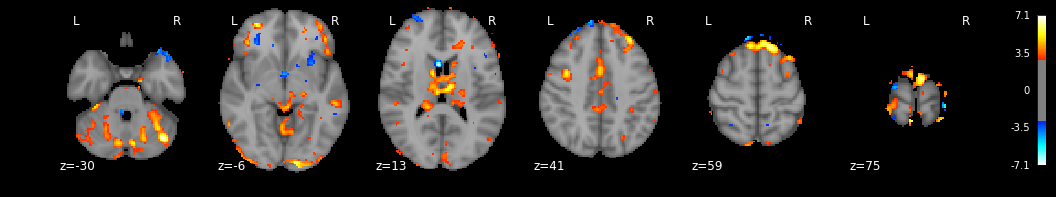

In [44]:
# Run contrast for motion effect (which voxels are associated with motion (translation in Y direction)?)
